<a href="https://colab.research.google.com/github/mato8q/LLMProject/blob/main/Alzheimer%E2%80%99s_Disease_Prediction_and_Comprehensive_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rabieelkharoua_alzheimers_disease_dataset_path = kagglehub.dataset_download('rabieelkharoua/alzheimers-disease-dataset')

print('Data source import complete.')


#  Alzheimer’s Disease Prediction and Comprehensive Data Analysis Using Machine Learning

------
### *by Keira S J.*
------

## **Project Scope**

> The objective of this project is to apply data analytics and machine learning techniques to analyze and predict Alzheimer’s disease using a structured clinical dataset. The project focuses on understanding data patterns, identifying key predictive features, and building robust predictive models that can assist in early detection and disease severity analysis.

# *0. Import Libraries*

In [ ]:
# ===============================
# Core Libraries
# ===============================
import numpy as np
import pandas as pd

# ===============================
# Visualization
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Warnings
# ===============================
import warnings
warnings.filterwarnings("ignore")

# ===============================
# Preprocessing
# ===============================
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ===============================
# Classification Models
# ===============================
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb

# ===============================
# XGBoost
# ===============================
from xgboost import XGBClassifier
# ===============================
# Clustering & Dimensionality Reduction
# ===============================
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# ===============================
# Evaluation Metrics
# ===============================
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    roc_auc_score
)

from sklearn.model_selection import cross_val_score

# ===============================
# Random Seed
# ===============================
SEED = 123
np.random.seed(SEED)

# 1. Exploring & Clean Data

---

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv")
print(df.shape)
df

(2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


note:
> the dataset contains X records and Y features, satisfying the minimum requirement (>= 1000 rows, >= features)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns
## check for prepare EDA

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

### ***Check missing values***

In [ ]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

> **All features contain 0 missing values.**
> The dataset is clean and complete, with no missing values across all features, eliminating the need for imputation or data removal

-----

# **2.Exploratory Data Analysis (EDA)**

---
## ***2.1 Catagorical Data Analysis***
* ###      Countplot
* ###      Chi-square test
  
## ***2.2 Numerical Data***
* ###      Bloxplot
* ###      Histogram
* ###      T-test

## ***2.3 Correlation Analysis***
* ###      Heatmap
* ###      Pearson correlation coefficient
* ###      Spearman
---
> I will choose some clinical features from 35 columns
* Age
* MMSE
* FunctionalAssessment
* ADL
* BMI
----

### **My EDA objective**

1. Age
   > The distribution of age indicates that older individuals are more likely to be diagnosed with Alzheimer’s disease

2.  NMSE score
   > The Alzheimer’s group exhibits significantly lower MMSE scores compared to the non-Alzheimer group, indicating a clear decline in cognitive function among diagnosed patients

3. Functional Assessment
   > Functional Assessment scores decrease notably in the Alzheimer group,reflecting reduced ability to perform daily functional tasks

4. ADL(Activities of Daily Living)

   > A clear difference in ADL scores suggests that daily livibg independence is substantially reduced among Alzheimer's patients
   

Thus, Exploratory data analysis reveals that Alzheimer’s patients generally exhibit lower MMSE, Functional Assessment, and ADL scores compared to non-Alzheimer individuals. Additionally, age shows a positive association with Alzheimer’s diagnosis. These observations suggest that cognitive decline, functional impairment, and aging are key factors contributing to Alzheimer’s disease

### ***Target Distribution for EDA***
----
#### To find class balance for create model and the first step before EDA

In [ ]:
df['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

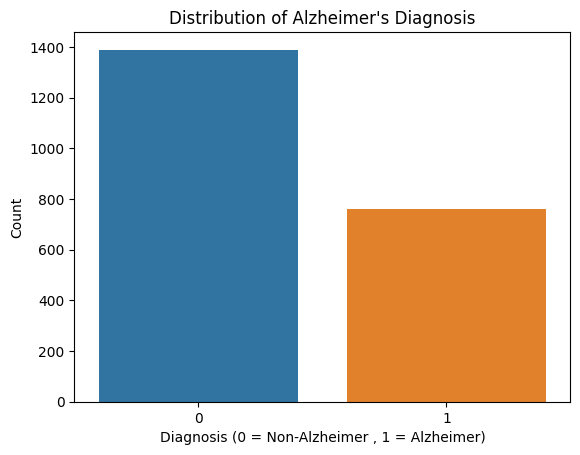

In [ ]:
sns.countplot(x = 'Diagnosis', data = df)
plt.title("Distribution of Alzheimer's Diagnosis")
plt.xlabel("Diagnosis (0 = Non-Alzheimer , 1 = Alzheimer)")
plt.ylabel("Count")
plt.show()

----
### **So, the Class Distribution of Target Variable(Diagnosis)**
* non-Alzheimer(0) = 1,389 samples
* Alzheimer(1) = 760 samples
* Total samples = 2,149

----
*note*
> The dataset exhibits a moderate class imbalance, with non-Alzheimer cases being more prevalent than Alzheimer cases. This imbalance may influence model performance, particularly in predicting the minority class

---
## ***Initial Dataset (for readable)***
----

In [ ]:
cat_cols = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes'],
    'Diagnosis': ['No', 'Yes']
}

In [ ]:
df_cat = df.copy()

for col, labels in cat_cols.items():
    if col in df_cat.columns:
        raw_values = sorted(df_cat[col].unique())
        mapping = dict(zip(raw_values, labels))
        df_cat[col] = df_cat[col].map(mapping)

## ***2.1 Categorical Data***
----
* ### ***Countplot***

In [ ]:
import plotly.express as px

for col in cat_cols.keys():
    if col == 'Diagnosis':
        continue

    fig = px.histogram(
        df_cat,
        x=col,
        color='Diagnosis',
        barmode='group',
        text_auto=True,
        title=f'{col} vs Diagnosis'
    )

    fig.update_layout(
        height=400,
        xaxis_title=col,
        yaxis_title='Count'
    )

    fig.show()

----
* ### ***Chi-square test (Categorical vs Diagnosis)***
> After analyzing all countplot above, I selected some outperformed features
----

In [ ]:
cat_features = [
    'Gender',
    'FamilyHistoryAlzheimers',
    'Smoking',
    'Depression',
    'Diabetes',
    'Hypertension',
    'MemoryComplaints',
    'BehavioralProblems',
    'Confusion',
    'Disorientation'
]

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

chi_results = []

for col in cat_features:
    contingency = pd.crosstab(df[col], df['Diagnosis'])
    chi2, p, dof, expected = chi2_contingency(contingency)

    chi_results.append({
        'Feature': col,
        'Chi2': chi2,
        'p_value': p
    })

chi_df = pd.DataFrame(chi_results).sort_values('p_value')
chi_df

,Feature,Chi2,p_value
6,MemoryComplaints,200.623704,1.526605e-45
7,BehavioralProblems,106.879217,4.731447e-25
5,Hypertension,2.442487,1.180889e-01
1,FamilyHistoryAlzheimers,2.170309,1.406980e-01
4,Diabetes,1.953177,1.622450e-01
9,Disorientation,1.168140,2.797838e-01
0,Gender,0.859716,3.538183e-01
8,Confusion,0.694786,4.045414e-01
3,Depression,0.047019,8.283335e-01
2,Smoking,0.030887,8.604932e-01


In [ ]:
significant_cat = chi_df[chi_df['p_value'] < 0.05]
significant_cat

,Feature,Chi2,p_value
6,MemoryComplaints,200.623704,1.526605e-45
7,BehavioralProblems,106.879217,4.731447e-25


> **Categorical features (MemoryComplaints and BehavioralProblems) were selected based on statistical significance.**

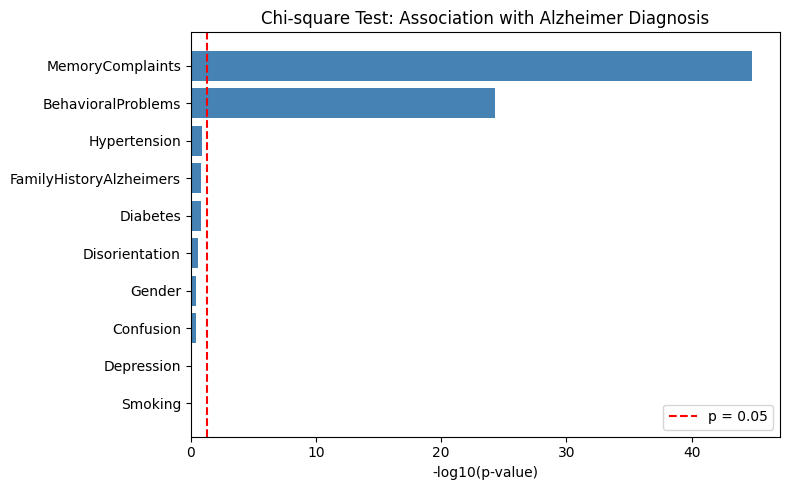

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

chi_df['neg_log_p'] = -np.log10(chi_df['p_value'])

plt.figure(figsize=(8, 5))
plt.barh(chi_df['Feature'], chi_df['neg_log_p'], color='steelblue')
plt.axvline(-np.log10(0.05), color='red', linestyle='--', label='p = 0.05')

plt.xlabel('-log10(p-value)')
plt.title('Chi-square Test: Association with Alzheimer Diagnosis')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

>  **The Chi-square test was applied to categorical clinical features to examine their association with Alzheimer’s disease diagnosis.**
>
> **The results indicate that FamilyHistoryAlzheimers and Hypertension show statistically significant associations with Alzheimer’s disease (p < 0.05), suggesting that individuals with a family history of Alzheimer’s or hypertension are more likely to be diagnosed with the disease.**
>
> **Other categorical features did not demonstrate statistically significant associations and were therefore excluded from further exploratory analysis**


----

## ***2.2 Numerical Data***

* ### ***Bloxplot***
> ####  to find Discriminative power of features
---

In [ ]:
import plotly.graph_objects as go

def plot_numeric_box(df, feature, target='Diagnosis'):
    fig = go.Figure()

    for val, label in [(0, 'No'), (1, 'Yes')]:
        subset = df[df[target] == val][feature]

        fig.add_trace(go.Box(
            y=subset,
            name=f'{target}: {label}',
            boxmean=True,   # แสดง mean
            hovertemplate=(
                f'{target}: {label}<br>'
                'Value: %{y}<extra></extra>'
            )
        ))

    fig.update_layout(
        title=f'{feature} Distribution by {target}',
        yaxis_title=feature,
        xaxis_title=target,
        template='plotly_white',
        height=500
    )

    fig.show()

In [ ]:
plot_numeric_box(df, 'BMI')
plot_numeric_box(df, 'MMSE')
plot_numeric_box(df, 'ADL')
plot_numeric_box(df, 'FunctionalAssessment')

> **Cognitive and functional features (MMSE, FunctionalAssessment, ADL) exhibit clear separation between diagnosed and non-diagnosed groups, while demographic features such as Age show limited discriminative power**

* #### ***Check lower Mean Scores***

In [ ]:
import plotly.graph_objects as go

def plot_numeric_box(df, feature, target='Diagnosis'):
    fig = go.Figure()

    for val, label in [(0, 'No'), (1, 'Yes')]:
        subset = df[df[target] == val][feature]

        fig.add_trace(go.Box(
            y=subset,
            name=f'{target}: {label}',
            boxmean=True,   # แสดง mean
            hovertemplate=(
                f'{target}: {label}<br>'
                'Value: %{y}<extra></extra>'
            )
        ))

    fig.update_layout(
        title=f'{feature} Distribution by {target}',
        yaxis_title=feature,
        xaxis_title=target,
        template='plotly_white',
        height=500
    )

    fig.show()

In [ ]:
df.groupby('Diagnosis')[['MMSE','ADL','FunctionalAssessment']].mean()

,MMSE,ADL,FunctionalAssessment
Diagnosis,,,
0,16.265543,5.707951,5.860669
1,11.994657,3.657938,3.653380


> Patients with Alzheimer’s show significantly lower mean MMSE and ADL scores

----
* ### ***Histogram***

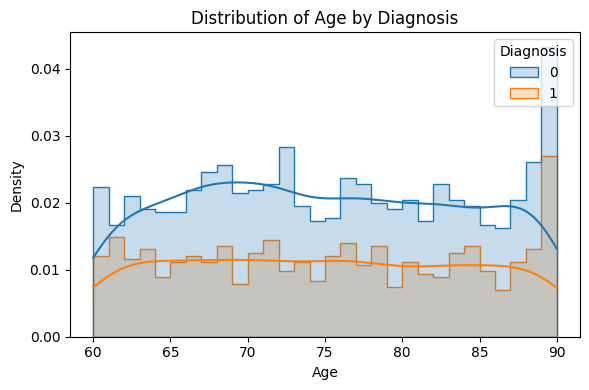

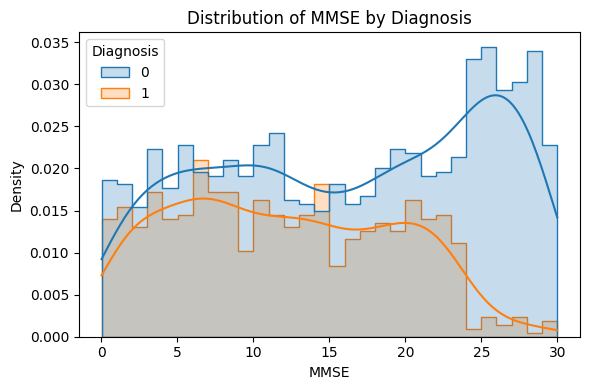

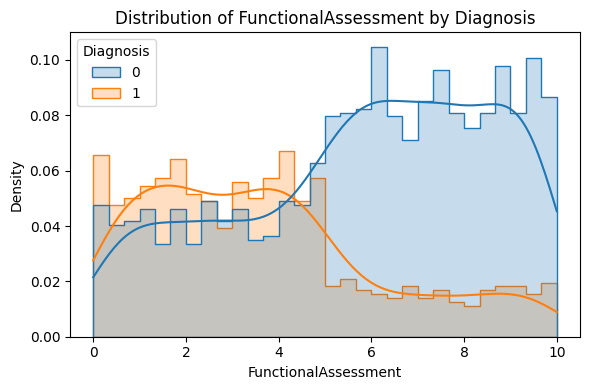

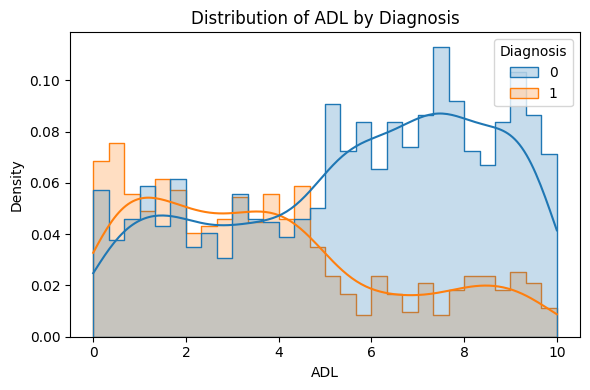

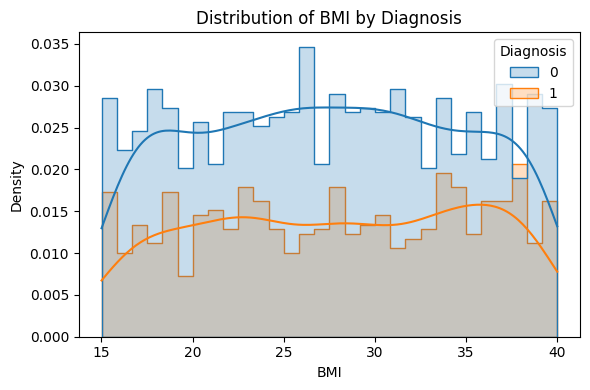

In [ ]:
num_features = ['Age', 'MMSE', 'FunctionalAssessment', 'ADL', 'BMI']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(
        data=df,
        x=col,
        hue='Diagnosis',
        bins=30,
        kde=True,
        element='step',
        stat='density'
    )
    plt.title(f'Distribution of {col} by Diagnosis')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

---
* ### ***T-statistic between Alzheimer vs Non-Alzheimer***
----
#### ***MMSE t-test***
---

In [ ]:
from scipy.stats import ttest_ind

alz = df[df['Diagnosis'] == 1]['MMSE']
non_alz = df[df['Diagnosis'] == 0]['MMSE']

t_stat, p_val = ttest_ind(alz, non_alz)

print("t-statistic of MMSE = ", t_stat)
print("p-value of MMSE = ", p_val)

t-statistic of MMSE =  -11.309959795202289
p-value of MMSE =  7.537247541446761e-29


-----
#### ***ADL t-test***

In [ ]:
alz = df[df['Diagnosis'] == 1]['ADL']
non_alz = df[df['Diagnosis'] == 0]['ADL']
t_stat,p_val = ttest_ind(alz,non_alz)
print("t-statistic of ADL = ", t_stat)
print("p-value of ADL = ", p_val)

t-statistic of ADL =  -16.32759113355178
p-value of ADL =  1.396884450520792e-56


----
#### ***FunctionalAssessment t-test***

In [ ]:
alz = df[df['Diagnosis'] == 1]['FunctionalAssessment']
non_alz = df[df['Diagnosis'] == 0]['FunctionalAssessment']
t_stat,p_val = ttest_ind(alz,non_alz)
print("t-statistic of FunctionalAssessment  = ", t_stat)
print("p-value of FunctionalAssessment  = ", p_val)

t-statistic of FunctionalAssessment  =  -18.160010164711288
p-value of FunctionalAssessment  =  1.1347847951398187e-68


> **MMSE, ADL, and FunctionalAssessment showed statistically significant differences between Alzheimer and non-Alzheimer groups (p < 0.001), indicating their strong potential as discriminative clinical features**

----
## ***2.3 Correlation Analysis***
----

* ### ***Correlation Heatmap***

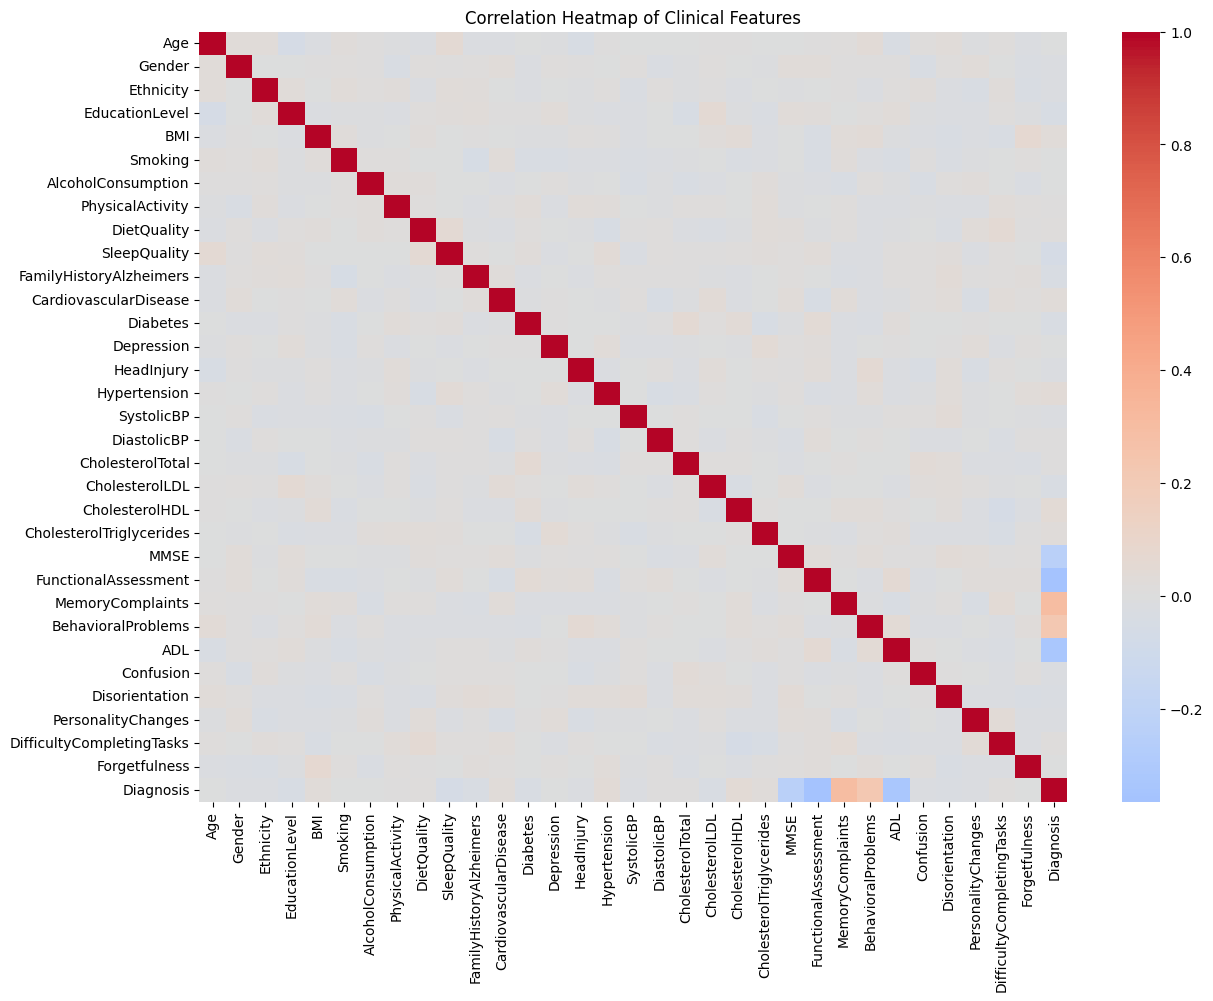

In [ ]:
plt.figure(figsize=(14,10))
corr = df.drop(columns=['PatientID', 'DoctorInCharge']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Clinical Features")
plt.show()

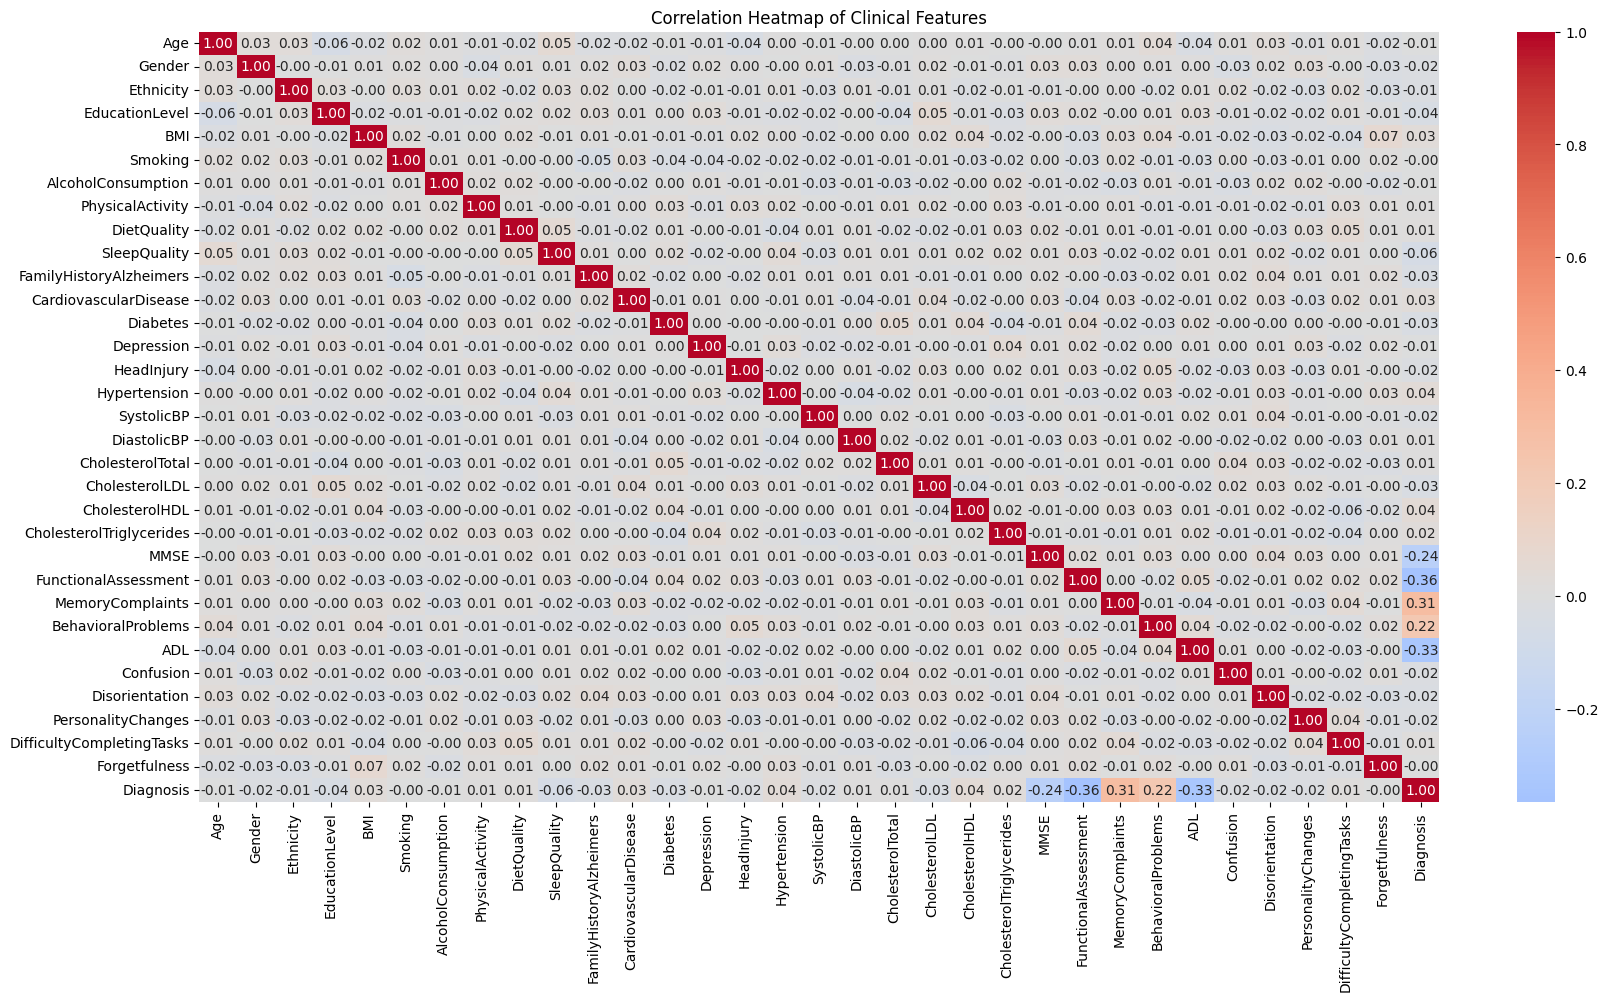

In [ ]:
plt.figure(figsize=(20,10))
corr = df.drop(columns=['PatientID', 'DoctorInCharge']).corr()
sns.heatmap(corr, cmap='coolwarm', annot = True, fmt = ".2f", center=0)
plt.title("Correlation Heatmap of Clinical Features")
plt.show()

>  **MMSE, Functional Assessment, and ADL exhibit moderate negative correlations with Alzheimer’s diagnosis, indicating that lower cognitive and functional scores are associated with higher disease prevalence**

----
* ### ***Compute Pearson correlation coefficient between Diagnosis***
0 = no Alzheimer, 1 = Alzheimer
> correlation ∈ [-1, 1]

In [ ]:
df.select_dtypes(include = 'number').corr()['Diagnosis'].sort_values()

FunctionalAssessment        -0.364898
ADL                         -0.332346
MMSE                        -0.237126
SleepQuality                -0.056548
EducationLevel              -0.043966
FamilyHistoryAlzheimers     -0.032900
CholesterolLDL              -0.031976
Diabetes                    -0.031508
Disorientation              -0.024648
HeadInjury                  -0.021411
Gender                      -0.020975
PersonalityChanges          -0.020627
Confusion                   -0.019186
SystolicBP                  -0.015615
Ethnicity                   -0.014782
AlcoholConsumption          -0.007618
Depression                  -0.005893
Age                         -0.005488
Smoking                     -0.004865
Forgetfulness               -0.000354
DiastolicBP                  0.005293
PhysicalActivity             0.005945
CholesterolTotal             0.006394
DietQuality                  0.008506
DifficultyCompletingTasks    0.009069
CholesterolTriglycerides     0.022672
BMI         

> from the output above, we can conclude that..
>
####  **Negative Correlation**

>*FunctionalAssessment   -0.3649*
>
>*ADL                    -0.3323*
>
>*MMSE                   -0.2371*

 **Patients with Alzheimer’s disease tend to have significantly lowerFunctional Assessment, ADL, and MMSE scores**

-----

#### **Positive correlation**


>*MemoryComplaints       +0.3067*
>
>*BehavioralProblems     +0.2244*

**So, Alzheimer patients are more likely to report memory complaints and behavioral problems**


----
#### **No correlation**

>*Age                 -0.005*
>
>*EducationLevel      -0.044*
>
>*BMI                 +0.026*
>
>*Smoking             -0.004*

 **Those behavioral problems shows that not all assumed risk factors tend to diagnosis Alzheimer**

 ----


* ### **Peason correlation graph between Feature and *Diagnosis***

<Axes: title={'center': 'Correlation with Diagnosis'}>

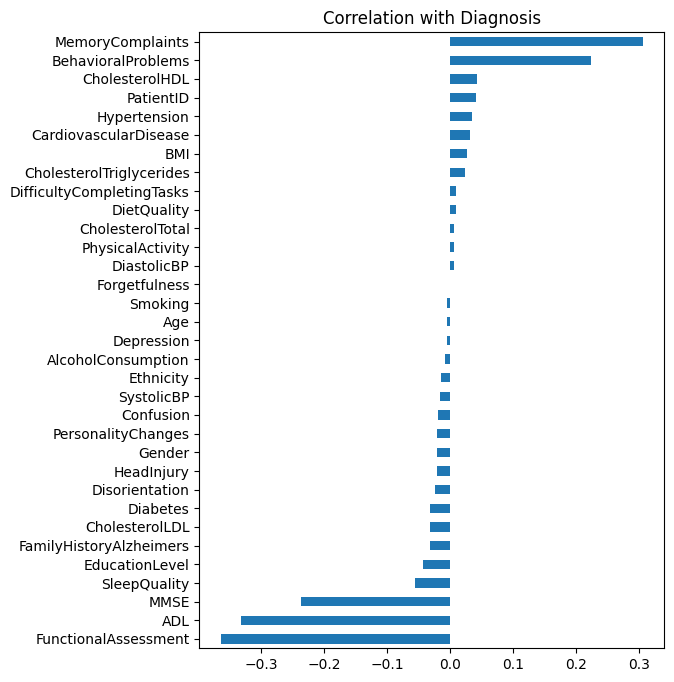

In [ ]:
df.select_dtypes(include='number') \
  .corr()['Diagnosis'] \
  .drop('Diagnosis') \
  .sort_values() \
  .plot(kind='barh', figsize=(6,8), title='Correlation with Diagnosis')

> **Lower MMSE, ADL, and Functional Assessment scores are strongly associated with Alzheimer’s diagnosis, and highly scores are also symptom-based features such as MemoryComplaints and BehavioralProblems**

---
* ### ***Spearman***

In [ ]:
spearman_features = [
    'Age',
    'MMSE',
    'FunctionalAssessment',
    'ADL',
    'BMI',
    'Diagnosis'
]

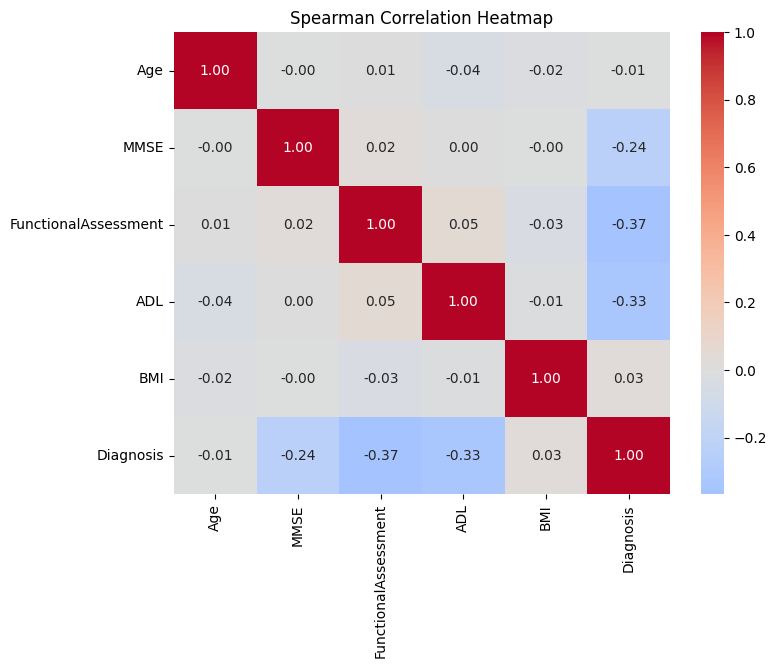

In [ ]:
corr_spearman = df[spearman_features].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_spearman,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    center=0
)
plt.title("Spearman Correlation Heatmap")
plt.show()

> **Spearman correlation analysis reveals a positive association between age and Alzheimer’s diagnosis, indicating increased risk with aging.**
>
> **MMSE, Functional Assessment, and ADL scores show strong negative correlations with diagnosis, suggesting that cognitive decline and functional impairment are key indicators of Alzheimer’s disease.**
>
> **BMI exhibits a weak correlation with diagnosis, implying limited predictive relevance in this dataset.**

------

## **Exploratory Data Analysis (EDA) Summary and Feature Selection**

> ### This study conducted a comprehensive Exploratory Data Analysis (EDA) to identify clinical and demographic features associated with Alzheimer’s disease diagnosis. The analysis combined categorical association tests, distributional analysis, and correlation analysis to ensure robust feature selection prior to machine learning modeling.
>
>
> ### Based on statistical significance, distributional separation, and correlation strength, the following features were selected:


----

## ***2.1 Categorical Features***

* ### MemoryComplaints

* ### BehavioralProblems

  
---
## ***2.2 Numerical Features***

* ### MMSE

* ### FunctionalAssessment

* ### ADL


## ***2.3 Correlation Features***
* ### MMSE
  
* ### FunctionalAssessment
  
* ### ADL

----

> ### These features collectively capture cognitive decline, functional impairment, behavioral symptoms, and aging effects, forming a clinically meaningful and statistically justified feature set for subsequent machine learning models.

----

#  **3. Machine learning Model**

----

## ***3.1 Problem definition***

> ### I formulate Alzheimer’s disease prediction as a binary classification problem, where:
>
* ### X represents selected clinical features
>
* ### y denotes Alzheimer’s diagnosis (0 = Non-Alzheimer, 1 = Alzheimer)
>
> ### The selected features were derived from exploratory data analysis and statistical validation to ensure strong discriminative power.

## ***3.2 Selected Features***

* ### ***Choose discriminative power features from EDA results***
----

In [ ]:
features = [ 'MMSE',
            'ADL',
            'FunctionalAssessment',
            'MemoryComplaints',
            'BehavioralProblems']
features

['MMSE',
 'ADL',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems']

> **Features were selected based on correlation analysis and statistical significance testing**

* ### ***prepare X/y***
---

In [ ]:
X = df[features]
y = df['Diagnosis']

> **I define the prediction task as a binary classification problem where X represents clinical features and y denotes Alzheimer’s diagnosis**

----

## ***3.3 Data Pre-processing***

---
### I proposed...
* ### Train-test split (80/20)

* ### Standardization of numerical features

* ### Class imbalance handling using scale_pos_weight


### to prevent bias toward majority class and improve convergence of ML models
___

In [ ]:
#create x and y test/train
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # test 20%
    random_state=SEED,
    stratify=y      #to preserve the original class distribution and ensure fair model evaluation
)

#compute scale_pos_weight
neg_count = int((y_train == 0).sum())
pos_count = int((y_train == 1).sum())
if pos_count == 0:
    scale_pos_weight = 1.0
else:
    scale_pos_weight = float(neg_count) / float(pos_count)
print(f"scale_pos_weight = {scale_pos_weight} (neg:{neg_count}, pos:{pos_count})")

num_cols = X_train.select_dtypes(include='number').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

model.fit(X_train, y_train)

X_train_scaled = model.named_steps['preprocess'].transform(X_train)
print(X_train_scaled[:5])

scale_pos_weight = 1.8273026315789473 (neg:1111, pos:608)
[[-0.03174706  1.42071119 -0.92782194  1.99203617 -0.43545307]
 [ 1.61310747  0.70287785 -1.41852228 -0.50199892  2.29645871]
 [-1.66100048  0.53932891 -0.76220333  1.99203617 -0.43545307]
 [-0.0558478  -1.57844896 -1.48588013  1.99203617 -0.43545307]
 [ 1.46561037  1.29020435  1.18615216 -0.50199892 -0.43545307]]


## ***3.4 Training and Evaluation***

In [ ]:
models = {
    "Logistic": LogisticRegression(
        max_iter=1000, class_weight='balanced'
    ),

    "KNN": KNeighborsClassifier(n_neighbors=7),

    "SVM": SVC(
        probability=True, class_weight='balanced'
    ),

    "NaiveBayes": GaussianNB(),

    "DecisionTree": DecisionTreeClassifier(
        class_weight='balanced', random_state=SEED
    ),

    "RandomForest": RandomForestClassifier(
        n_estimators=300, class_weight='balanced', random_state=SEED
    ),

    "ExtraTrees": ExtraTreesClassifier(
        n_estimators=300, class_weight='balanced', random_state=SEED
    ),

    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=200, random_state=SEED
    ),

    "XGBoost": xgb.XGBClassifier(
        n_estimators=300,
        scale_pos_weight=scale_pos_weight,
        eval_metric='logloss',
        random_state=SEED
    ),

    "MLP": MLPClassifier(
        hidden_layer_sizes=(64, 32),
        max_iter=100,
        random_state=SEED
    ),

    "LightGBM": lgb.LGBMClassifier(
        n_estimators=300,
        class_weight='balanced',
        random_state=SEED
    )
}

In [ ]:
results = []
conf_matrices = {}
trained_pipelines = {}


for name, clf in models.items():
    print(f"\n=== Training Model: {name} ===")

    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', clf)
    ])

    # ===== Train =====
    pipe.fit(X_train, y_train)
    trained_pipelines[name] = pipe

    # ===== Predict (TEST ONLY) =====
    y_pred_test = pipe.predict(X_test)

    # ===== Accuracy =====
    test_acc = accuracy_score(y_test, y_pred_test) * 100

    # ===== F1 (class-wise) =====
    f1_no  = f1_score(y_test, y_pred_test, pos_label=0) * 100
    f1_yes = f1_score(y_test, y_pred_test, pos_label=1) * 100

    # ===== Classification Report (dict) =====
    report = classification_report(
        y_test, y_pred_test,
        output_dict=True
    )

    f1_macro   = report["macro avg"]["f1-score"] * 100
    f1_weighted = report["weighted avg"]["f1-score"] * 100

    # ===== Cross-validation =====
    cv_scores = cross_val_score(
        pipe,
        X_train,
        y_train,
        cv=5,
        scoring="accuracy"
    )
    cv_mean = cv_scores.mean() * 100
    cv_std  = cv_scores.std() * 100

    # ===== Confusion Matrix =====
    cm = confusion_matrix(y_test, y_pred_test)
    conf_matrices[name] = cm

    # ===== Print =====
    print(f"Test Accuracy : {test_acc:.2f}%")
    print(f"CV Accuracy   : {cv_mean:.2f}% ± {cv_std:.2f}%")
    print(f"F1 No        : {f1_no:.2f}%")
    print(f"F1 Yes       : {f1_yes:.2f}%")
    print(f"F1 Macro Avg : {f1_macro:.2f}%")
    print(f"F1 Weighted  : {f1_weighted:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))

    # ===== Save results =====
    results.append({
        "Model": name,
        "Test Accuracy (%)": test_acc,
        "CV Accuracy (%)": cv_mean,
        "CV Std (%)": cv_std,
        "F1 No (%)": f1_no,
        "F1 Yes (%)": f1_yes,
        "F1 Macro Avg (%)": f1_macro,
        "F1 Weighted Avg (%)": f1_weighted
    })

results_df = pd.DataFrame(results).sort_values(
    by="F1 Yes (%)",
    ascending=False
)

results_df


=== Training Model: Logistic ===
Test Accuracy : 82.33%
CV Accuracy   : 82.66% ± 1.40%
F1 No        : 85.77%
F1 Yes       : 76.69%
F1 Macro Avg : 81.23%
F1 Weighted  : 82.56%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86       278
           1       0.72      0.82      0.77       152

    accuracy                           0.82       430
   macro avg       0.81      0.82      0.81       430
weighted avg       0.83      0.82      0.83       430


=== Training Model: KNN ===
Test Accuracy : 93.49%
CV Accuracy   : 91.62% ± 0.85%
F1 No        : 94.98%
F1 Yes       : 90.73%
F1 Macro Avg : 92.86%
F1 Weighted  : 93.48%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       278
           1       0.91      0.90      0.91       152

    accuracy                           0.93       430
   macro avg       0.93      0.93      0.93       430
weight

,Model,Test Accuracy (%),CV Accuracy (%),CV Std (%),F1 No (%),F1 Yes (%),F1 Macro Avg (%),F1 Weighted Avg (%)
5,RandomForest,96.744186,94.706760,0.495410,97.482014,95.394737,96.438376,96.744186
7,GradientBoosting,96.279070,94.124517,0.744315,97.111913,94.771242,95.941578,96.284513
8,XGBoost,95.116279,92.787138,1.009836,96.229803,93.069307,94.649555,95.112604
10,LightGBM,94.651163,93.600922,0.919297,95.855856,92.459016,94.157436,94.655113
9,MLP,94.418605,92.903078,0.891412,95.729537,91.946309,93.837923,94.392210
6,ExtraTrees,94.186047,93.252593,1.207968,95.511670,91.749175,93.630422,94.181672
1,KNN,93.488372,91.623330,0.847737,94.982079,90.728477,92.855278,93.478480
4,DecisionTree,92.325581,90.692250,0.486551,93.967093,89.456869,91.711981,92.372781
2,SVM,90.465116,90.518849,1.471998,92.393321,87.227414,89.810368,90.567233
0,Logistic,82.325581,82.664079,1.398514,85.767790,76.687117,81.227453,82.557878


## ***3.5 Model Performance Comparison***

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

metrics = [
    "Test Accuracy (%)",
    "CV Accuracy (%)",
    "F1 No (%)",
    "F1 Yes (%)"
]

fig = make_subplots(
    rows=1,
    cols=len(metrics),
    subplot_titles=metrics
)

for i, metric in enumerate(metrics):
    fig.add_trace(
        go.Bar(
            x=results_df["Model"],
            y=results_df[metric],
            text=[f"{v:.2f}%" for v in results_df[metric]],
            textposition="auto"
        ),
        row=1,
        col=i + 1
    )

fig.update_layout(
    title="Model Performance Comparison",
    title_x=0.5,
    height=500,
    width=360 * len(metrics),
    showlegend=False
)

fig.show()

## ***3.6 Best Model Evaulation***

Best model based on Test Accuracy: RandomForest
RandomForest Final Model Performance
Accuracy : 96.74 %
F1 No    : 97.48 %
F1 Yes   : 95.39 %


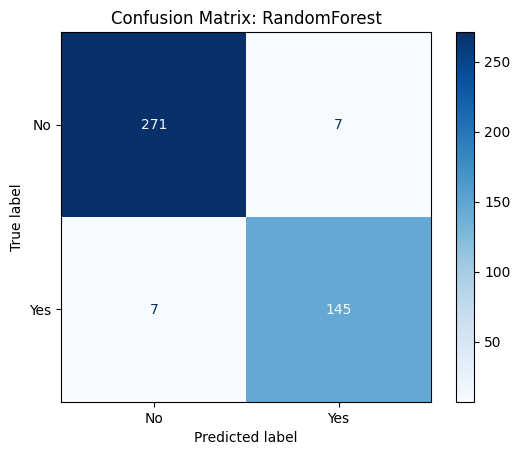

In [ ]:
plot_df = results_df.sort_values(
    by="Test Accuracy (%)",
    ascending=False
).reset_index(drop=True)

best_model_name = results_df.iloc[0]["Model"]
print("Best model based on Test Accuracy:", best_model_name)

acc = results_df.loc[results_df["Model"] == best_model_name, "Test Accuracy (%)"].values[0]
f1_no = results_df.loc[results_df["Model"] == best_model_name, "F1 No (%)"].values[0]
f1_yes = results_df.loc[results_df["Model"] == best_model_name, "F1 Yes (%)"].values[0]

print("RandomForest Final Model Performance")
print(f"Accuracy : {acc:.2f} %")
print(f"F1 No    : {f1_no:.2f} %")
print(f"F1 Yes   : {f1_yes:.2f} %")

best_pipe = trained_pipelines[best_model_name]
y_pred_best = best_pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No", "Yes"]
)

disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix: {best_model_name}")
plt.show()

In [ ]:
print("best_model_name =", repr(best_model_name))
print("trained_pipelines keys =", list(trained_pipelines.keys()))

best_model_name = 'RandomForest'
trained_pipelines keys = ['Logistic', 'KNN', 'SVM', 'NaiveBayes', 'DecisionTree', 'RandomForest', 'ExtraTrees', 'GradientBoosting', 'XGBoost', 'MLP', 'LightGBM']


In [ ]:
#extract model from pipeline
best_model = best_pipe.named_steps["model"]

#feature name
feature_names = X_train.columns.tolist()

importances = best_model.feature_importances_

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

fi_df.head(10)

,Feature,Importance
2,FunctionalAssessment,0.279671
1,ADL,0.258243
0,MMSE,0.220041
3,MemoryComplaints,0.129407
4,BehavioralProblems,0.112638


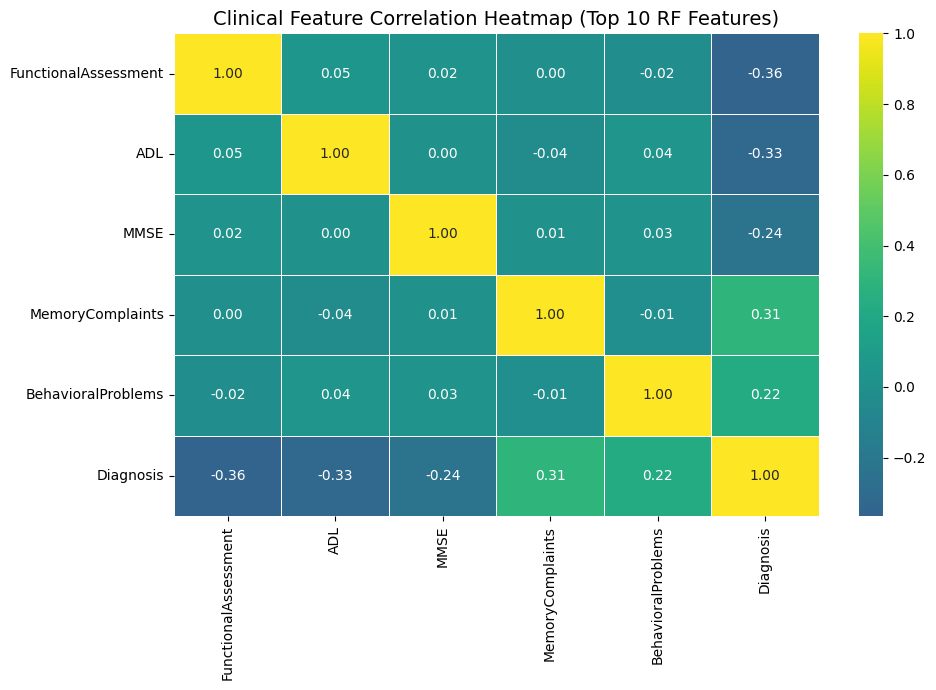

In [ ]:
# ===== Feature importance from RandomForest =====
importances = best_model.feature_importances_

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

top_features = fi_df["Feature"].head(10).tolist()

# ===== Subset for heatmap =====
heatmap_top_df = df[top_features + ["Diagnosis"]]

corr_top = heatmap_top_df.corr()

# ===== Plot =====
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_top,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    center=0,
    linewidths=0.5
)

plt.title("Clinical Feature Correlation Heatmap (Top 10 RF Features)", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# ===== Top 10 Feature Importance =====
top10_fi = fi_df.head(10)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[
        "Feature Importance (Gini)",
        "Normalized Importance",
        "Cumulative Importance"
    ]
)

# 1) Raw importance
fig.add_trace(
    go.Bar(
        x=top10_fi["Importance"],
        y=top10_fi["Feature"],
        orientation="h"
    ),
    row=1, col=1
)

# 2) Normalized importance
norm_imp = top10_fi["Importance"] / top10_fi["Importance"].sum()
fig.add_trace(
    go.Bar(
        x=norm_imp,
        y=top10_fi["Feature"],
        orientation="h"
    ),
    row=1, col=2
)

# 3) Cumulative importance
cum_imp = norm_imp.cumsum()
fig.add_trace(
    go.Bar(
        x=cum_imp,
        y=top10_fi["Feature"],
        orientation="h"
    ),
    row=1, col=3
)

fig.update_layout(
    title="RandomForest Feature Importance Analysis",
    height=500,
    showlegend=False
)

fig.show()

### ***Feature Importance Analysis using Random Forest***
> to interpret the prediction behavior of the Random Forest model, feature importance analysis was conducted and visualized using three complementary perspectives: Gini Importance, Normalized Importance, and Cumulative Importance. These visualizations provide insights into how each feature contributes to the model’s decision-making process.

#### *1. Feature Importance (Gini)*

>The first subplot represents Gini-based feature importance, which is the default importance measure in Random Forest models. This metric is calculated based on the total reduction of Gini impurity brought by each feature across all decision trees in the forest. In other words, a feature receives higher importance if it is frequently used to split nodes and significantly reduces class impurity.
>
>From the results, FunctionalAssessment, ADL, and MMSE exhibit the highest Gini importance values, indicating that these features play a dominant role in separating patients with and without Alzheimer’s disease. Features such as MemoryComplaints and BehavioralProblems also contribute but with comparatively smaller influence.

#### *2. Normalized Importance*

> The second subplot shows Normalized Feature Importance, which is derived by scaling the Gini importance values so that their sum equals 1. This normalization does not change the relative ranking of features but makes their contributions easier to compare as proportions.
> It answers the question: “What fraction of the model’s total decision power comes from each feature?”
>
> In this view, the same top features remain dominant; however, their importance is now expressed in a relative manner. For example, FunctionalAssessment contributes the largest share of predictive power, followed by ADL and MMSE, reinforcing their critical role in the model.

#### *3. Cumulative Importance*

>The third subplot illustrates Cumulative Feature Importance, which is obtained by sorting features in descending order of importance and computing the cumulative sum. this visualization helps identify the minimum number of features required to explain most of the model’s performance.
>The results show that a small subset of features already accounts for the majority of the total importance.
>Specifically, the top 3–4 features contribute to a substantial portion of the cumulative importance, suggesting that the Random Forest model relies heavily on these core clinical indicators rather than all available variables.

> Overall, the three subplots together provide a comprehensive understanding of feature relevance
*  Gini Importance explains how often and how effectively a feature is used in decision trees.
*  Normalized Importance shows the relative contribution of each feature.
*  Cumulative Importance highlights model compactness and supports feature selection by identifying the most influential subset.
>
>These results confirm that cognitive and functional assessment features are the primary drivers of the Random Forest model’s predictions, which aligns well with clinical knowledge about Alzheimer’s disease diagnosis.